#### Import Required Libraries

In [1]:
# Analysis
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
import joblib

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Harrison\Downloads\sentiment_analysis_project\data\cleaned_data.csv")
                   
data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


In [3]:
# Check the number unique values in each features
data.nunique()

Reviewer       11065
Country          147
StarRatings        5
Subject        11177
Review         11158
Date_posted     1372
dtype: int64

We can notice that there are 147 unique countries where the reviews came from

In [4]:
# Check for missing values
data.isnull().sum()

Reviewer         3
Country          3
StarRatings      0
Subject          0
Review         839
Date_posted      0
dtype: int64

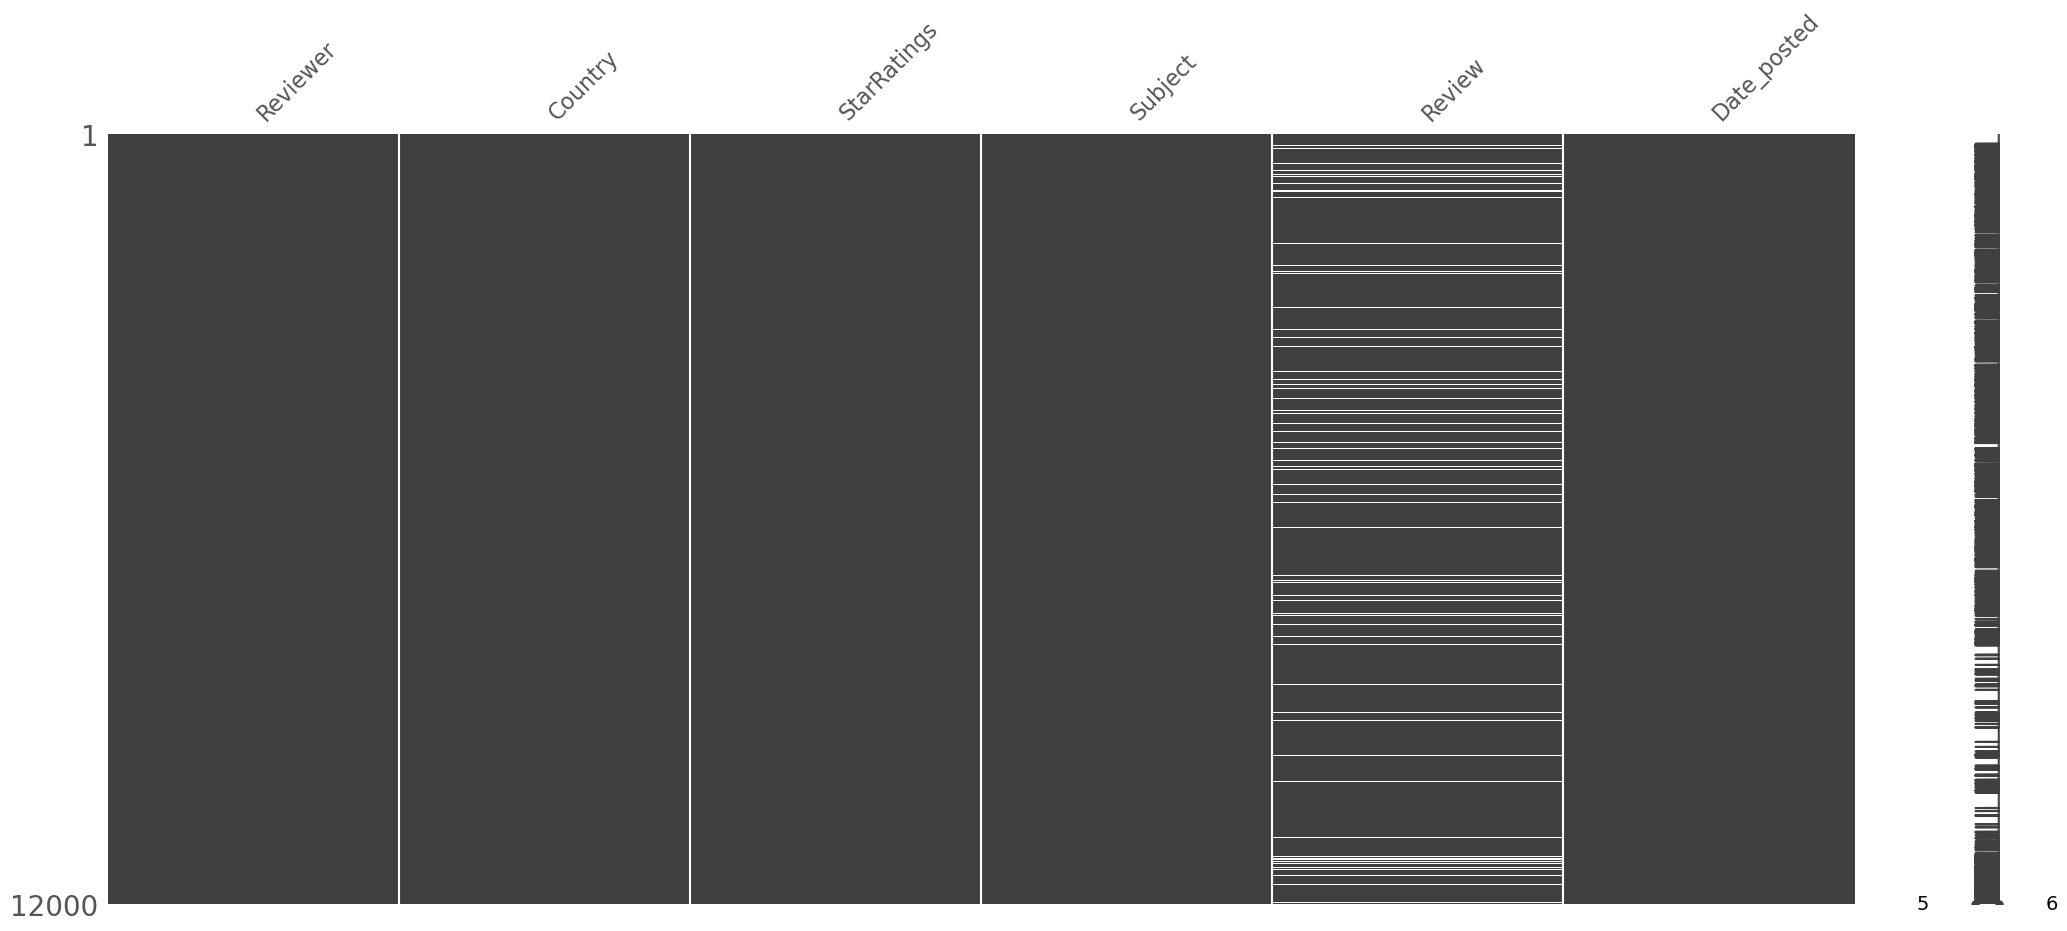

In [5]:
 # Visualizing the missing data
import missingno as msno

# Visualize nullity patterns
msno.matrix(data)

plt.show()

The dataset contains a small number of missing values in the 'Reviewer' and 'Country' columns and a substantial number in the 'Review' column. Despite this, we have decided to retain all data points, including those with missing information as potential insight could be derived from the columns

In [6]:
data.shape

(12000, 6)

In [7]:
# Save the cleaned data

data.to_csv('cleaned_data.csv', index=False)

The final dataset contains 12,000 rows and 6 columns

### Explortatory Data Analysis (EDA)

In [8]:
data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


- **Analyzing the 'StarRatings' Column**

In [9]:
# Distinct values of 'StarRatings'
print(f"StarRatings Value Count: \n{data['StarRatings'].value_counts()}")

StarRatings Value Count: 
StarRatings
1    6418
5    4488
2     412
4     402
3     280
Name: count, dtype: int64


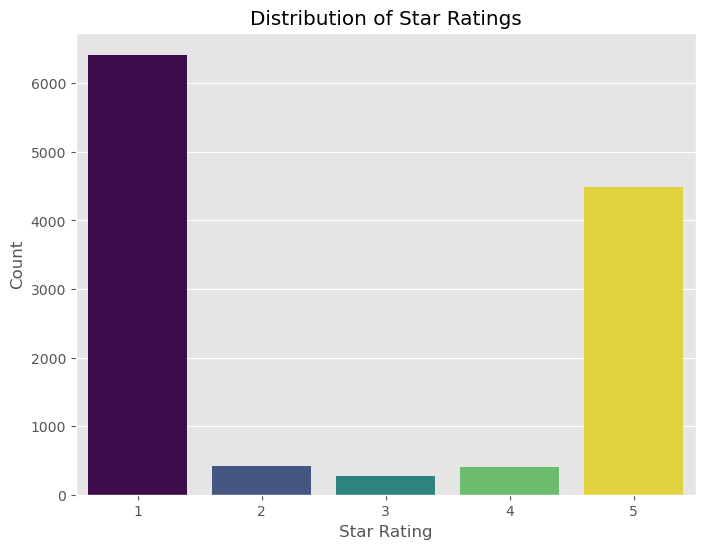

In [10]:
# Plot the distribution of star ratings with different colors
plt.figure(figsize=(8, 6))
sns.countplot(x='StarRatings', data=data, hue='StarRatings', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)  # Remove the legend as it's redundant in this case
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


The data is telling us that the major of the reviews have a StarRating of 1 followed by a StarRating of 5

In [11]:
# Looking at the Percentage distribution of the 'StarRatings' column

print(f"Rating Value Count - Percentage Distribution: \n{round(data['StarRatings'].value_counts()/data.shape[0]*100,2)}")

Rating Value Count - Percentage Distribution: 
StarRatings
1    53.48
5    37.40
2     3.43
4     3.35
3     2.33
Name: count, dtype: float64


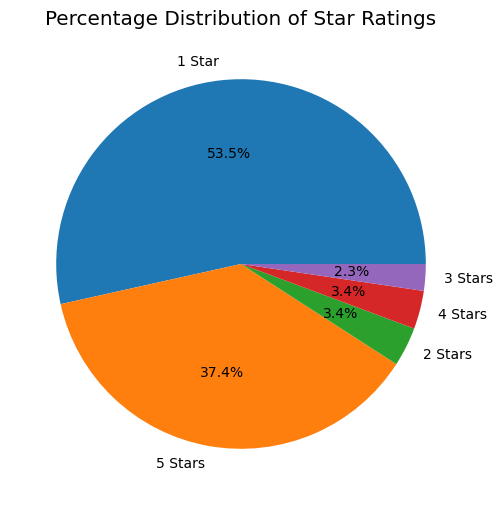

In [12]:
# Visualizing the Percentage Distribution of 'StarRatings'

ratings = ['1 Star', '5 Stars', '2 Stars', '4 Stars', '3 Stars']
percentages = [53.48, 37.40, 3.43, 3.35, 2.33]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=ratings, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Percentage Distribution of Star Ratings')
plt.show()

This is an imbalanced data, as can be seen.d sentences.

Because of data imbalance we will classify the StarRatings as either positive or negative.

Assumptions:
- if StarRatings is greater than or equal to 3, we will classify it as 'Positive'
- If StarRatings is less than 3, we will classify it as 'Negative'

In [13]:
# Creating a 'StarRatings_Sentiment' column to classify the sentiment of reviews based on the StarRatings

# Define the classification function
def classify_rating(StarRatings):
    if StarRatings >= 3:
        return 'Positive'
    else:
        return 'Negative'

# Apply the classification
data['StarRatings_Sentiment'] = data['StarRatings'].apply(classify_rating)

data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024",Positive
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024",Negative
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024",Negative


In [14]:
# Sentiment distribution
sentiment_counts = data['StarRatings_Sentiment'].value_counts()
print(sentiment_counts)

StarRatings_Sentiment
Negative    6830
Positive    5170
Name: count, dtype: int64


Base on our  assumptions, the data is a little bit balance

C:\Users\Harrison\AppData\Local\Temp\ipykernel_13052\2748207049.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)


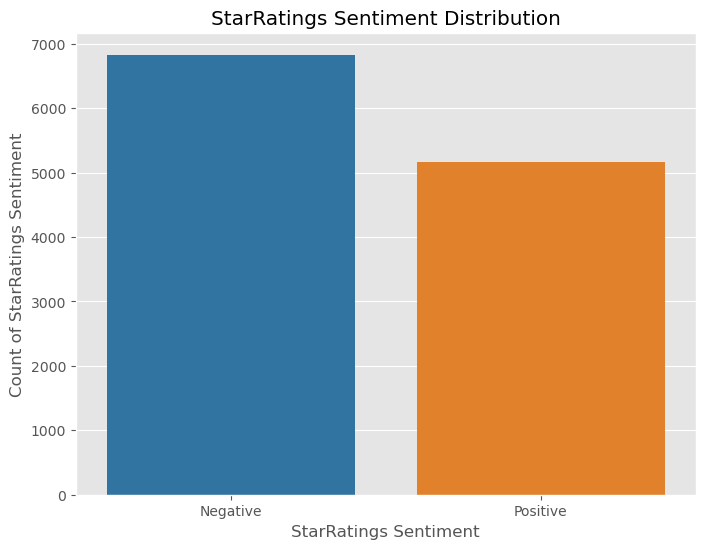

In [15]:
# Visualizing the Sentiment column
sentiment_counts = data['StarRatings_Sentiment'].value_counts()

# Get the colors from the tab10 color map
colors = plt.get_cmap('tab10').colors

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('StarRatings Sentiment Distribution')
plt.xlabel('StarRatings Sentiment')
plt.ylabel('Count of StarRatings Sentiment')
plt.xticks(rotation=0)
plt.show()


In [16]:
# Looking at the Percentage distribution of the 'Sentiment' column

print(f"StarRatings Sentiment Value Count - Percentage Distribution: \n{round(data['StarRatings_Sentiment'].value_counts()/data.shape[0]*100,2)}")

StarRatings Sentiment Value Count - Percentage Distribution: 
StarRatings_Sentiment
Negative    56.92
Positive    43.08
Name: count, dtype: float64


Sentiment distribution
- 56.92% reviews are negative
- 43.08% reviews are positive

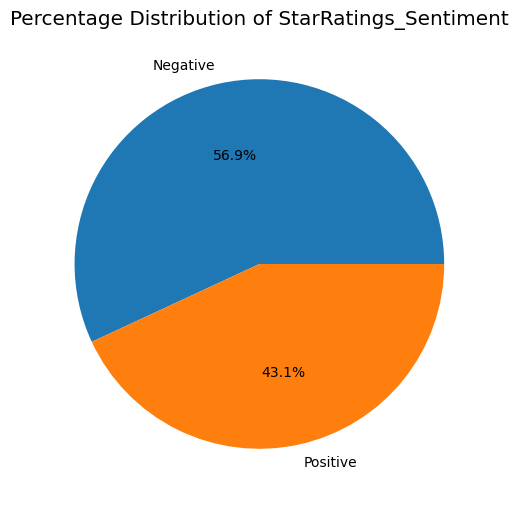

In [17]:
# Visualizing the Percentage Distribution of 'Sentiment'

# Data
sentiments = ['Negative', 'Positive']
percentages = [56.92, 43.08]

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=sentiments, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Percentage Distribution of StarRatings_Sentiment')
plt.show()

In [18]:
# StarRating Sentiment = Negative
data[data['StarRatings_Sentiment'] == 'Negative']['StarRatings'].value_counts()

StarRatings
1    6418
2     412
Name: count, dtype: int64

Based on our StarRatings categorisation, 6,830 reviews are negative

In [19]:
# StarRatings Sentiment = Positive
data[data['StarRatings_Sentiment'] == 'Positive']['StarRatings'].value_counts()

StarRatings
5    4488
4     402
3     280
Name: count, dtype: int64

5,170 reviews are positive based on our categorization

#### Word Cloud

To enable us see the wordcloud, we need to preprocess the data first

##### Data Preprocessing
- Text Cleaning: Remove noise, special characters, and irrelevant information.
- Tokenization: Split text into tokens.

In [20]:
data.sample(1)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment
11993,HongSeok Choi,KR,5,The product is very good.,The product is very good.\nThe delivery was fast.,"Thursday, August 27, 2020",Positive


In [21]:
# Text cleaning and Tokenization

import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text cleaning functions
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

def to_lowercase(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespace(text):
    return ' '.join(text.split())

# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Lemmatization
def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]

# Comprehensive preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = remove_html_tags(text)
    text = to_lowercase(text)
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_whitespace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_words(tokens)
    return tokens

# Apply preprocessing to the 'Review' column
data['cleaned_review'] = data['Review'].apply(preprocess_text)

data.head(3)

,Reviewer,Country,StarRatings,Subject,Review,Date_posted,StarRatings_Sentiment,cleaned_review
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024",Positive,"[amazon, easy, work, fulfill, order, via, rd, ..."
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024",Positive,"[using, aliexpress, well, year, consistently, ..."
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024",Positive,"[good, customercentric, marketplace, neverthel..."


In [22]:
data['cleaned_review']

0        [amazon, easy, work, fulfill, order, via, rd, ...
1        [using, aliexpress, well, year, consistently, ...
2        [good, customercentric, marketplace, neverthel...
3        [purchased, android, tesla, style, radio, inst...
4        [absolute, con, job, dont, waste, money, scamm...
                               ...                        
11995                             [im, happy, come, thank]
11996                                 [excellent, quality]
11997    [ordered, item, aliexpress, two, seller, cance...
11998    [great, platform, business, vendor, would, nev...
11999    [satisfied, aliexpress, recently, however, cha...
Name: cleaned_review, Length: 12000, dtype: object

- Creating a Word Cloud of the most frequent words in all reviews

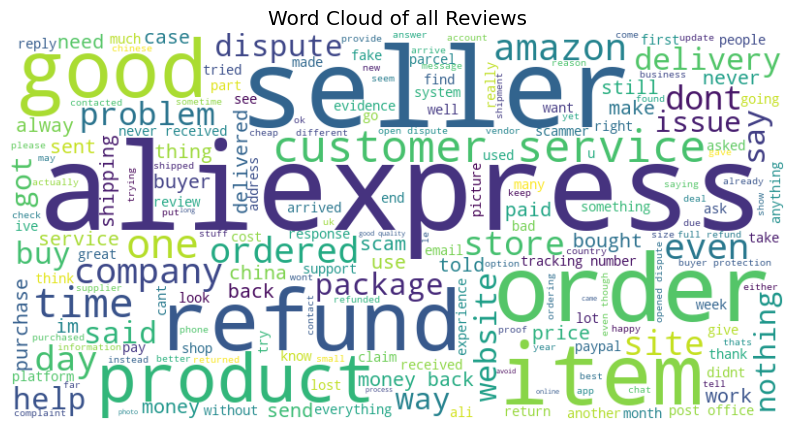

In [23]:
from wordcloud import WordCloud
# Combine all reviews into a single string
all_reviews = ' '.join([' '.join(tokens) for tokens in data['cleaned_review']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of all Reviews')
plt.show()

The word cloud displays the frequently occurring words in the reviews in a visual format, clearly showing their importance and prevalence in the reviews. This allows for observation of trends and features in the text data.

- Plotting the most frequent words

C:\Users\Harrison\AppData\Local\Temp\ipykernel_13052\2124540365.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='term', data=term_freq_data.head(20), palette='viridis')


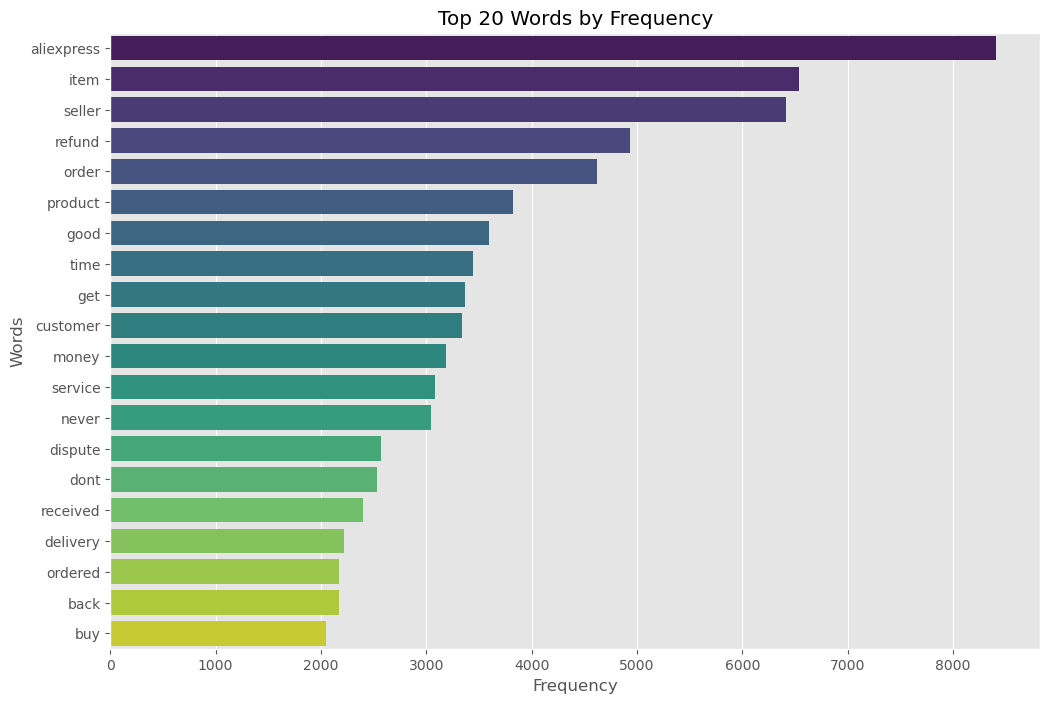

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine tokens back into strings for each review
data['cleaned_review'] = data['cleaned_review'].apply(lambda tokens: ' '.join(tokens))

# Calculate Term Frequency using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_review'])

# Sum the term frequencies across all documents
term_frequencies = X.sum(axis=0).A1

# Create a DataFrame of terms and their frequencies
terms = vectorizer.get_feature_names_out()
term_freq_data = pd.DataFrame({'term': terms, 'frequency': term_frequencies})

# Sort the DataFrame by frequency
term_freq_data = term_freq_data.sort_values(by='frequency', ascending=False)

# Plot the top 20 terms
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='term', data=term_freq_data.head(20), palette='viridis')
plt.title('Top 20 Words by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

This shows the most frequent words in the review, with 'aliexpress' topping the chart followed by the word 'item'